# 线性回归

In [1]:
from sklearn.linear_model import LinearRegression

In [3]:
lr_model = LinearRegression()

In [30]:
import numpy as np

x = np.arange(1, 11)
y = 2 * np.arange(1, 11) + 5
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 7,  9, 11, 13, 15, 17, 19, 21, 23, 25]))

In [32]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [33]:
x.shape

(10, 1)

In [34]:
lr_model.fit(x, y)

LinearRegression()

In [35]:
a = lr_model.coef_
b = lr_model.intercept_

In [36]:
a, b

(array([[2.]]), array([5.]))

In [45]:
x_new = np.random.randint(low=1, high=30, size=10).reshape(-1, 1)
predictions = lr_model.predict(x_new)
np.hstack((x_new, x_new * 2 + 5, predictions))

array([[ 5., 15., 15.],
       [20., 45., 45.],
       [ 5., 15., 15.],
       [ 6., 17., 17.],
       [11., 27., 27.],
       [23., 51., 51.],
       [18., 41., 41.],
       [21., 47., 47.],
       [ 6., 17., 17.],
       [21., 47., 47.]])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

y_new = x_new * 2 + 5
MSE = mean_squared_error(y_new, predictions)
R2 = r2_score(y_new, predictions)

In [51]:
R2, MSE

(1.0, 2.524354896707238e-29)

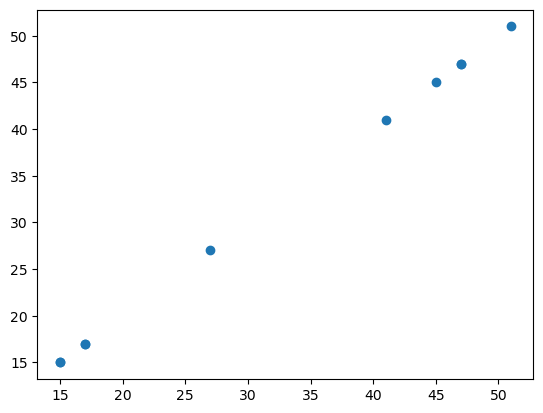

In [53]:
from matplotlib import pyplot as plt

plt.scatter(y_new, predictions)

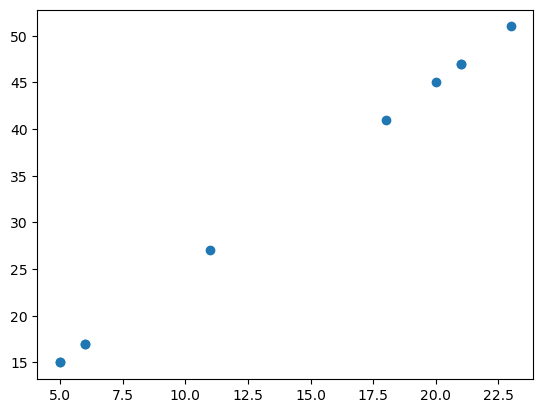

In [54]:
plt.scatter(x_new, y_new)

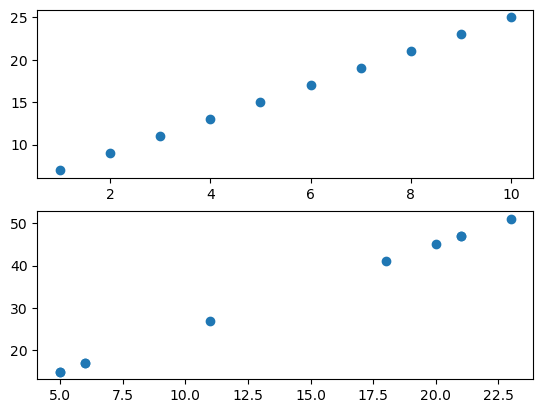

In [58]:
fig1 = plt.subplot(211)
plt.scatter(x, y)
fig2 = plt.subplot(212)
plt.scatter(x_new, y_new)

# 单因子线性回归

In [64]:
import pandas as pd

data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week2/generated_data.csv')

In [66]:
data.head()
print(type(data), data.shape)

<class 'pandas.core.frame.DataFrame'> (10, 2)


In [67]:
x = data.loc[:, 'x']
y = data.loc[:, 'y']
x, y

(0     1
 1     2
 2     3
 3     4
 4     5
 5     6
 6     7
 7     8
 8     9
 9    10
 Name: x, dtype: int64,
 0     7
 1     9
 2    11
 3    13
 4    15
 5    17
 6    19
 7    21
 8    23
 9    25
 Name: y, dtype: int64)

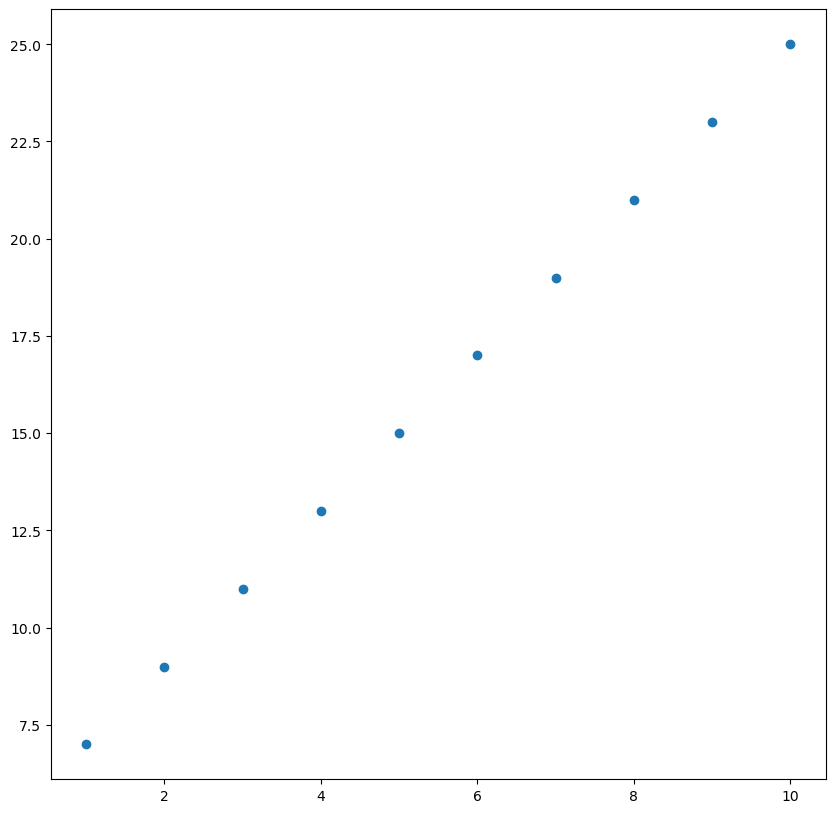

In [73]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.show()

In [74]:
lr_model = LinearRegression()

In [76]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
lr_model.fit(x, y)

LinearRegression()

In [77]:
lr_model.coef_, lr_model.intercept_

(array([[2.]]), array([5.]))

In [78]:
y_predict = lr_model.predict(x)

In [79]:
y_predict

array([[ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.],
       [23.],
       [25.]])

In [80]:
lr_model.predict([[3.5]])

array([[12.]])

In [81]:
a = lr_model.coef_
b = lr_model.intercept_

In [82]:
MSE = mean_squared_error(y,y_predict)
R2 = r2_score(y,y_predict)
MSE,R2

(3.1554436208840474e-31, 1.0)

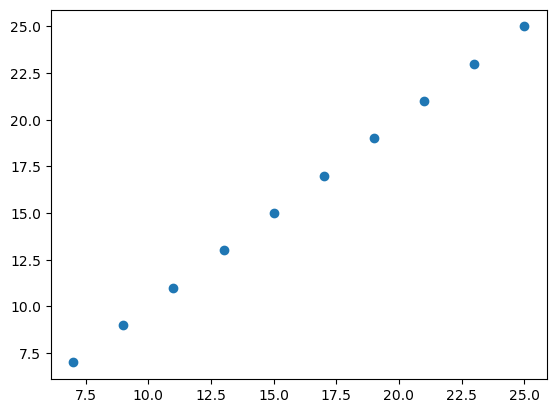

In [84]:
plt.figure()
plt.scatter(y,y_predict)
plt.show()

# 多因子线性回归

In [136]:
data = pd.read_csv('other_learn/week2/usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


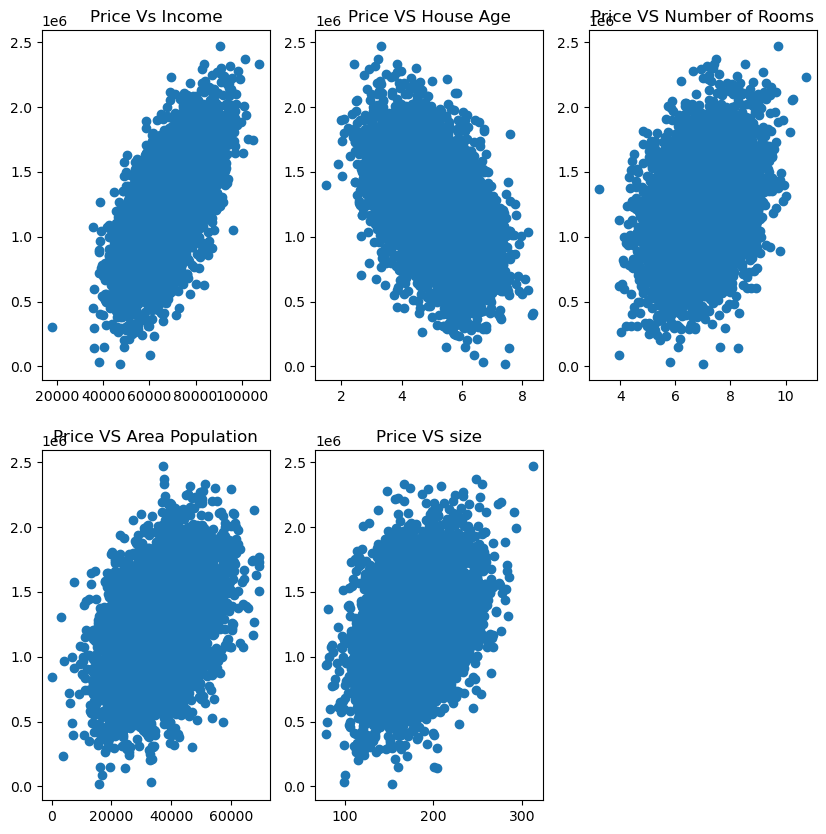

In [89]:
fig = plt.figure(figsize=(10,10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price Vs Income')

fig2 =plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3 =plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 =plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 =plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show()

In [92]:
X = data.loc[:,'size']
y = data.loc[:,'Price']

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [93]:
LR1 = LinearRegression()
LR1.fit(X,y)

LinearRegression()

In [94]:
y_predict_1 = LR1.predict(X)
y_predict_1

array([[1276881.85636623],
       [1173363.58767144],
       [1420407.32457443],
       ...,
       [1097848.86467426],
       [1264502.88144558],
       [1131278.58816273]])

In [96]:
MSE_1 = mean_squared_error(y,y_predict_1)
R2_1 = r2_score(y,y_predict_1)
MSE_1,R2_1

(108771672553.6264, 0.1275031240418234)

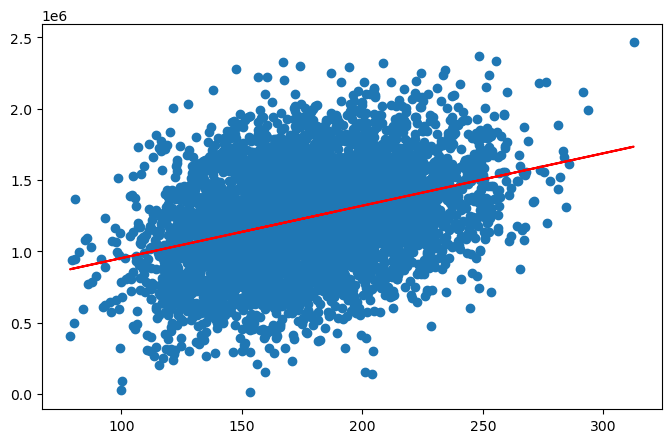

In [102]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X,y_predict_1,'r')
plt.show()

In [104]:
X_multi = data.drop(['Price'],axis=1)
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [106]:
LR_multi = LinearRegression()
LR_multi.fit(X_multi,y)

LinearRegression()

In [107]:
y_multi_predict = LR_multi.predict(X_multi)

In [108]:
MSE_2 = mean_squared_error(y,y_multi_predict)
R2_2 = r2_score(y,y_multi_predict)
MSE_2,R2_2

(10219846512.17786, 0.9180229195220739)

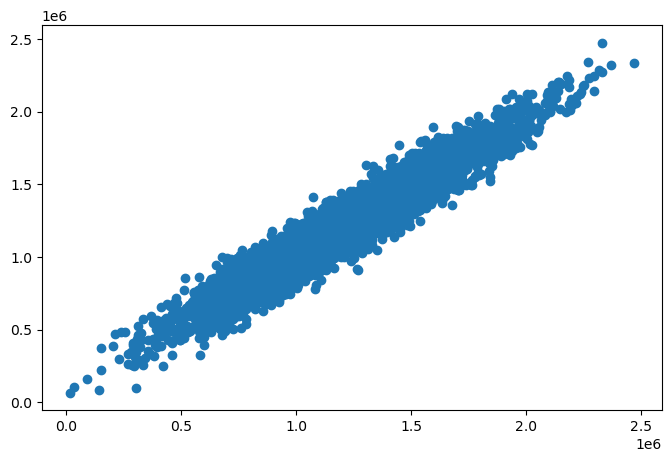

In [110]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_multi_predict)
plt.show()

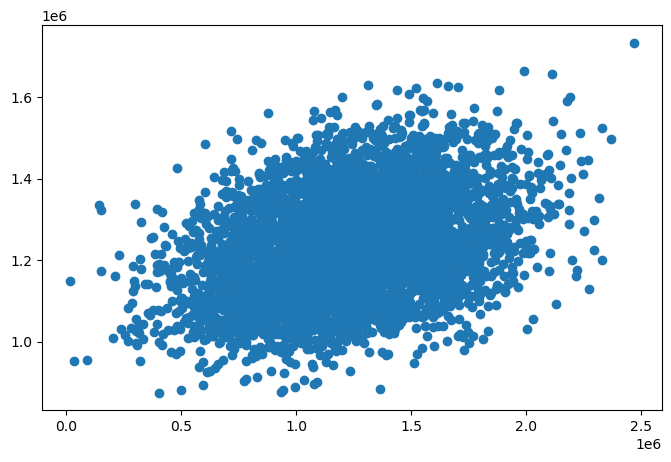

In [111]:
fig8 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_1)
plt.show()

In [134]:
X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)
print(X_test)

[[65000     5     5 30000   200]]


In [135]:
y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[[817052.19516298]]


C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
